In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


from iris.experimental.regrid import regrid_weighted_curvilinear_to_rectilinear

import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

In [2]:
filename_1='CCSM4_midHolocene.cvdp_data.1000-1300.nc'
ccsm=xr.open_dataset(filename_1,decode_times=False)

filename_2='CCSM4_piControl.cvdp_data.250-1300.nc'
pi_ccsm=xr.open_dataset(filename_2,decode_times=False)

filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)

filename_7='FGOALS-g2_midHolocene.cvdp_data.340-1019.nc'
fgoalsg2=xr.open_dataset(filename_7,decode_times=False)

filename_8='FGOALS-g2_piControl.cvdp_data.201-900.nc'
pi_fgoalsg2=xr.open_dataset(filename_8,decode_times=False)


filename_11='GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_15='INM-CM4-8_midHolocene.cvdp_data.1880-2079.nc'
inm=xr.open_dataset(filename_15,decode_times=False)

filename_16='INM-CM4-8_piControl.cvdp_data.1850-2380.nc'
pi_inm=xr.open_dataset(filename_16,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)


filename_21='MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc'
mpi2=xr.open_dataset(filename_21,decode_times=False)

filename_22='MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc'
pi_mpi2=xr.open_dataset(filename_22,decode_times=False)

filename_23='MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc'
mri=xr.open_dataset(filename_23,decode_times=False)

filename_24='MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc'
pi_mri=xr.open_dataset(filename_24,decode_times=False)

filename_25='MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc'
mpip=xr.open_dataset(filename_25,decode_times=False)

filename_26='MPI-ESM-P_piControl.cvdp_data.1850-3005.nc'
pi_mpip=xr.open_dataset(filename_26,decode_times=False)


filename_27='MRI-CGCM3_midHolocene.cvdp_data.1951-2050.nc'
mri3=xr.open_dataset(filename_27,decode_times=False)

filename_28='MRI-CGCM3_piControl.cvdp_data.1851-2350.nc'
pi_mri3=xr.open_dataset(filename_28,decode_times=False)

filename_29='NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)


In [3]:
ccsm_amoc_mean=ccsm.amoc_mean_ann
pi_ccsm_amoc_mean=pi_ccsm.amoc_mean_ann

cesm_amoc_mean=cesm.amoc_mean_ann
pi_cesm_amoc_mean=pi_cesm.amoc_mean_ann

ec_amoc_mean=ec.amoc_mean_ann
pi_ec_amoc_mean=pi_ec.amoc_mean_ann

fgoalsg2_amoc_mean=fgoalsg2.amoc_mean_ann
pi_fgoalsg2_amoc_mean=pi_fgoalsg2.amoc_mean_ann

giss_amoc_mean=giss.amoc_mean_ann
pi_giss_amoc_mean=pi_giss.amoc_mean_ann

hadgem_amoc_mean=hadgem.amoc_mean_ann
pi_hadgem_amoc_mean=pi_hadgem.amoc_mean_ann

inm_amoc_mean=inm.amoc_mean_ann
pi_inm_amoc_mean=pi_inm.amoc_mean_ann

ipsl_amoc_mean=ipsl.amoc_mean_ann
pi_ipsl_amoc_mean=pi_ipsl.amoc_mean_ann

mpi2_amoc_mean=mpi2.amoc_mean_ann
pi_mpi2_amoc_mean=pi_mpi2.amoc_mean_ann

mri_amoc_mean=mri.amoc_mean_ann
pi_mri_amoc_mean=pi_mri.amoc_mean_ann

mpip_amoc_mean=mpip.amoc_mean_ann
pi_mpip_amoc_mean=pi_mpip.amoc_mean_ann

mri3_amoc_mean=mri3.amoc_mean_ann
pi_mri3_amoc_mean=pi_mri3.amoc_mean_ann

noresm2_amoc_mean=noresm2.amoc_mean_ann
pi_noresm2_amoc_mean=pi_noresm2.amoc_mean_ann

In [4]:
amoc_mean=[ccsm_amoc_mean, cesm_amoc_mean, ec_amoc_mean, fgoalsg2_amoc_mean, giss_amoc_mean,
          hadgem_amoc_mean, inm_amoc_mean, ipsl_amoc_mean, mpi2_amoc_mean, mri_amoc_mean,
          mpip_amoc_mean, mri3_amoc_mean, noresm2_amoc_mean]

In [5]:
pi_amoc_mean=[pi_ccsm_amoc_mean, pi_cesm_amoc_mean, pi_ec_amoc_mean, pi_fgoalsg2_amoc_mean, pi_giss_amoc_mean,
          pi_hadgem_amoc_mean, pi_inm_amoc_mean, pi_ipsl_amoc_mean, pi_mpi2_amoc_mean, pi_mri_amoc_mean,
          pi_mpip_amoc_mean, pi_mri3_amoc_mean, pi_noresm2_amoc_mean]

In [6]:
modelname=['ccsm', 'cesm', 'ec', 'fgoalsg2', 'giss',
          'hadgem', 'inm', 'ipsl', 'mpi2', 'mri',
          'mpip', 'mri3', 'noresm2']

In [7]:
model_name=['CCSM4','CESM2','EC_Earth3-LR','FGOALS-G2','GISS-E2-1-G','HadGEM3-CG31-LL',
           'INM-CM4-8','IPSL-CM6A-LR','MPI-ESM1-2-LR','MRI-ESM2-0','MPI-ESM-P','MRI-CGCM3',
           'NorESM2-LM']

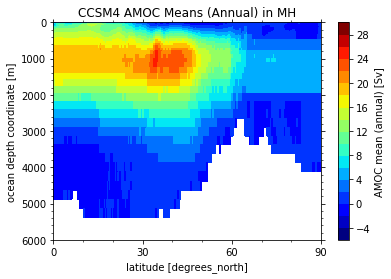

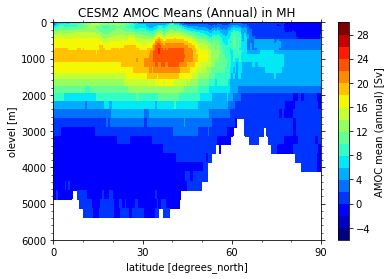

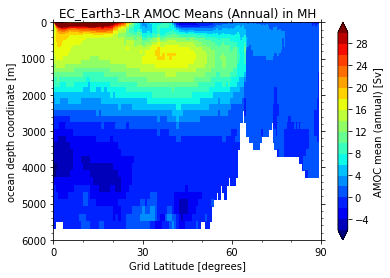

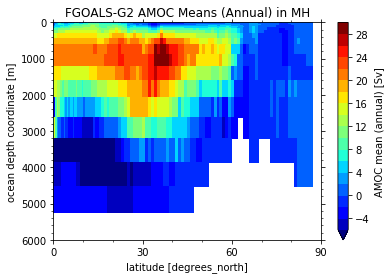

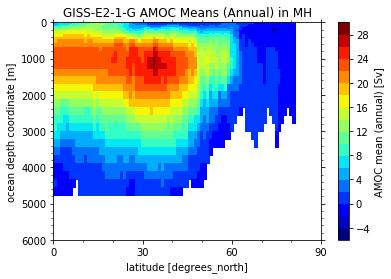

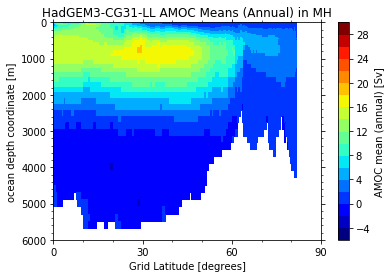

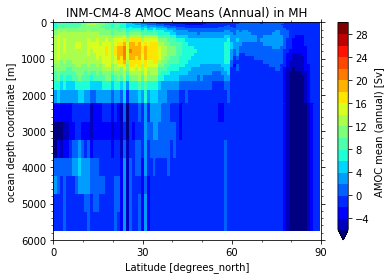

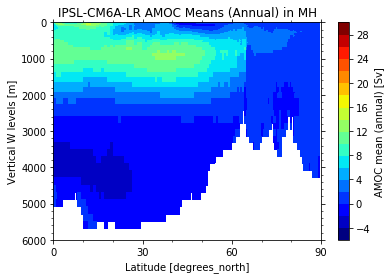

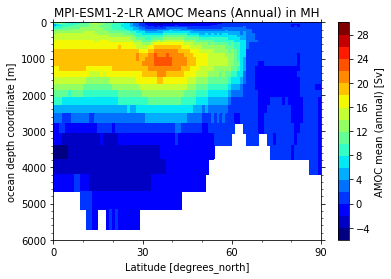

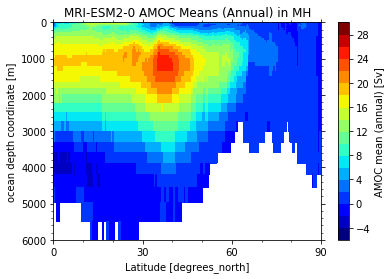

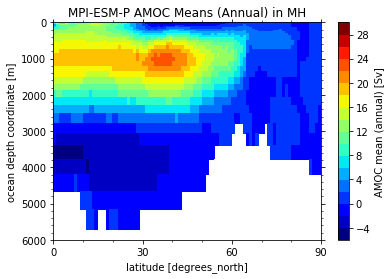

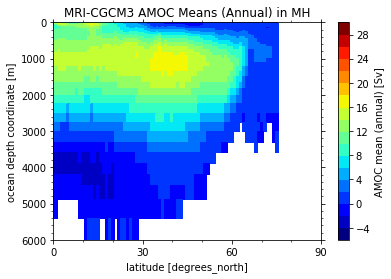

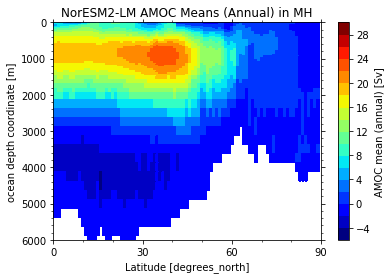

In [17]:
for i in range (0,len(modelname)):
    fig=plt.figure() 
    ax=fig.add_subplot(111)

    lat_sliced=amoc_mean[i].sel(lat_amoc=slice(0,90))
    level=np.arange(-6,32,2)
    lat_sliced.plot(yincrease=False,cmap='jet',levels=level)

    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.yaxis.set_major_locator(MultipleLocator(1000))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

    ax.set_ylim(6000,0)
    ax.set_xlim(0,90)
    ax.set(title='%s AMOC Means (Annual) in MH' %(model_name[i]))

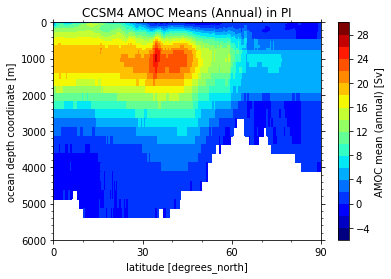

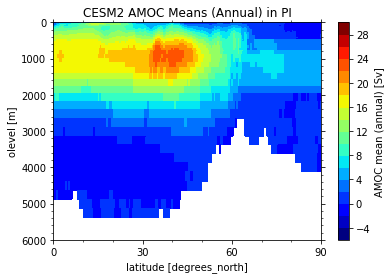

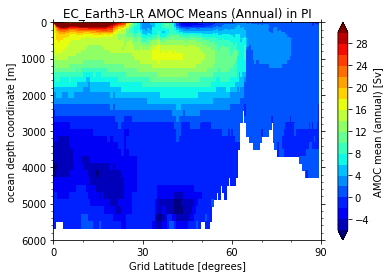

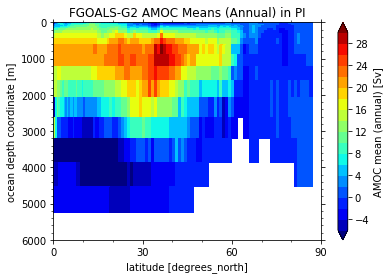

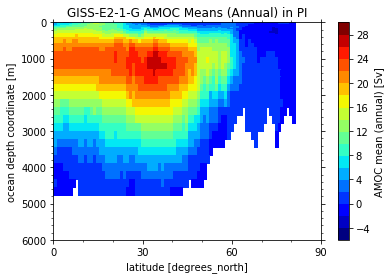

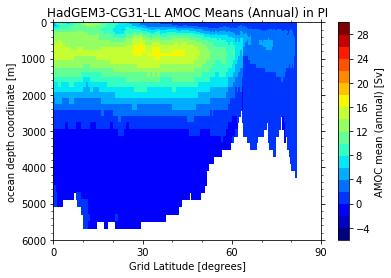

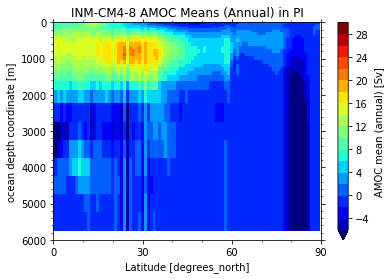

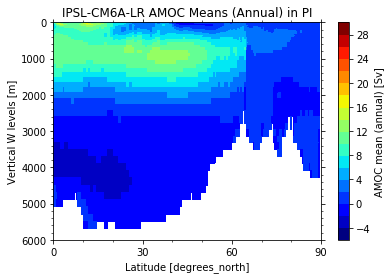

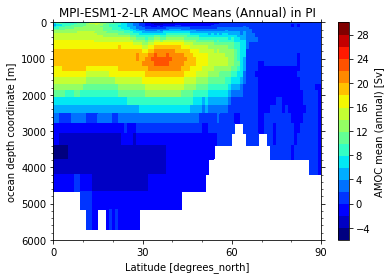

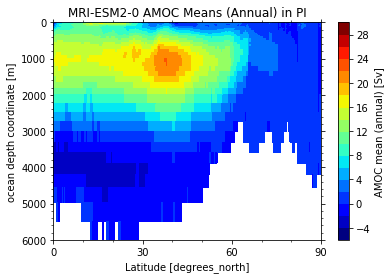

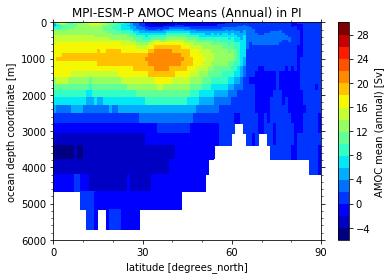

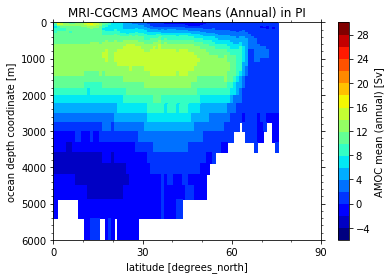

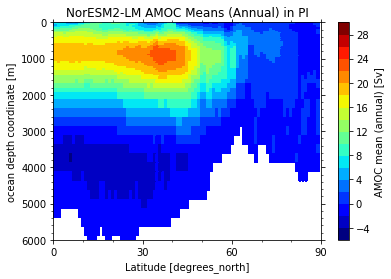

In [49]:
for i in range (0,len(modelname)):
    fig=plt.figure() 
    ax=fig.add_subplot(111)

    pi_lat_sliced=pi_amoc_mean[i].sel(lat_amoc=slice(0,90))
    level=np.arange(-6,32,2)
    pi_lat_sliced.plot(yincrease=False,cmap='jet',levels=level)

    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.yaxis.set_major_locator(MultipleLocator(1000))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

    ax.set_ylim(6000,0)
    ax.set_xlim(0,90)
    ax.set(title='%s AMOC Means (Annual) in PI' %(model_name[i]))

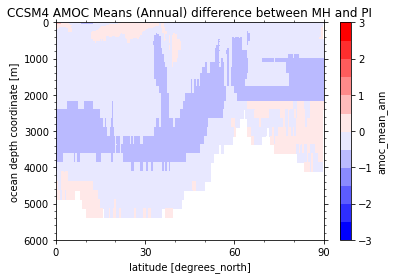

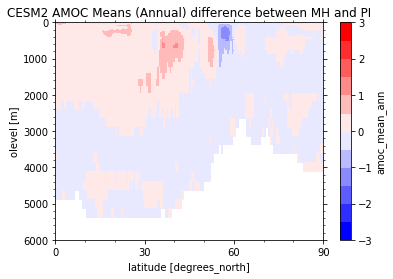

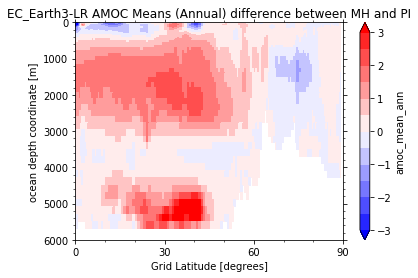

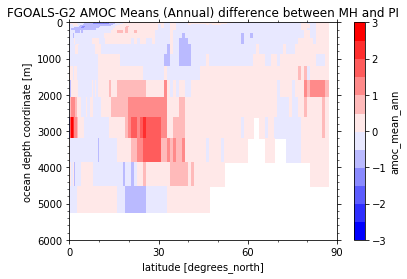

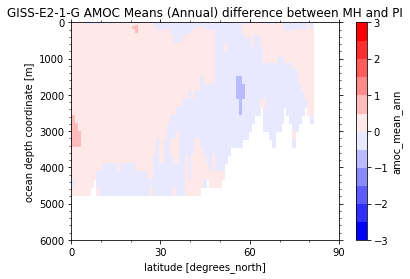

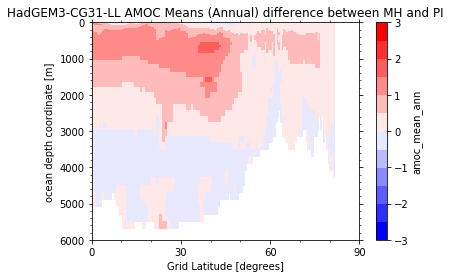

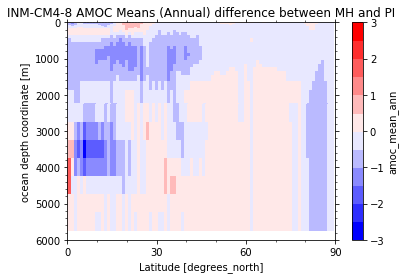

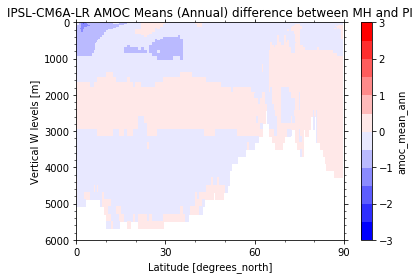

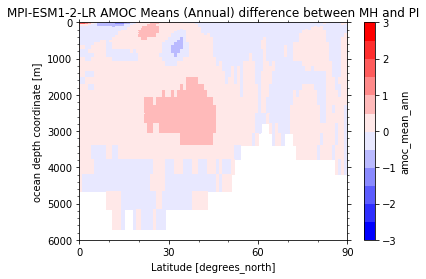

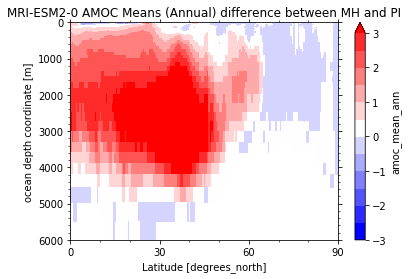

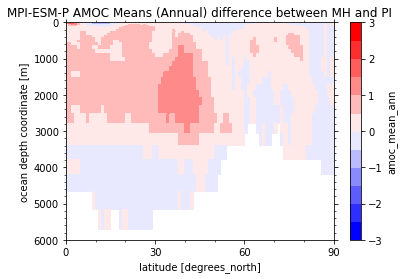

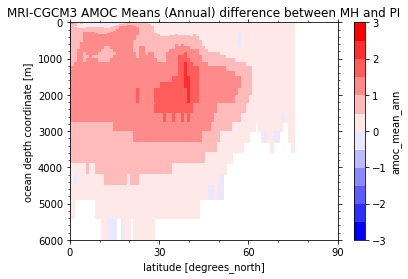

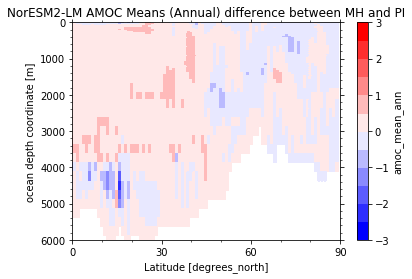

In [41]:
for j in range (0,len(model_name)):
    fig=plt.figure() 
    ax=fig.add_subplot(111)
    
    amoc_diff=amoc_mean[j]-pi_amoc_mean[j]
    lat_sliced_diff=amoc_diff.sel(lat_amoc=slice(0,90))
    level=np.arange(-3,3.5,0.5)
    c=lat_sliced_diff.plot(yincrease=False,cmap='bwr',levels=level)

    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.yaxis.set_major_locator(MultipleLocator(1000))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

    ax.set_ylim(6000,0)
    ax.set_xlim(0,90)
    ax.set(title='%s AMOC Means (Annual) difference between MH and PI' %(model_name[j]))

In [26]:
ccsm_amoc_pattern=ccsm.amoc_pattern_ann
pi_ccsm_amoc_pattern=pi_ccsm.amoc_pattern_ann

cesm_amoc_pattern=cesm.amoc_pattern_ann
pi_cesm_amoc_pattern=pi_cesm.amoc_pattern_ann

ec_amoc_pattern=ec.amoc_pattern_ann
pi_ec_amoc_pattern=pi_ec.amoc_pattern_ann

fgoalsg2_amoc_pattern=fgoalsg2.amoc_pattern_ann
pi_fgoalsg2_amoc_pattern=pi_fgoalsg2.amoc_pattern_ann

giss_amoc_pattern=giss.amoc_pattern_ann
pi_giss_amoc_pattern=pi_giss.amoc_pattern_ann

hadgem_amoc_pattern=hadgem.amoc_pattern_ann
pi_hadgem_amoc_pattern=pi_hadgem.amoc_pattern_ann

inm_amoc_pattern=inm.amoc_pattern_ann
pi_inm_amoc_pattern=pi_inm.amoc_pattern_ann

ipsl_amoc_pattern=ipsl.amoc_pattern_ann
pi_ipsl_amoc_pattern=pi_ipsl.amoc_pattern_ann

mpi2_amoc_pattern=mpi2.amoc_pattern_ann
pi_mpi2_amoc_pattern=pi_mpi2.amoc_pattern_ann

mri_amoc_pattern=mri.amoc_pattern_ann
pi_mri_amoc_pattern=pi_mri.amoc_pattern_ann

mpip_amoc_pattern=mpip.amoc_pattern_ann
pi_mpip_amoc_pattern=pi_mpip.amoc_pattern_ann

mri3_amoc_pattern=mri3.amoc_pattern_ann
pi_mri3_amoc_pattern=pi_mri3.amoc_pattern_ann

noresm2_amoc_pattern=noresm2.amoc_pattern_ann
pi_noresm2_amoc_pattern=pi_noresm2.amoc_pattern_ann


In [27]:
amoc_pattern=[ccsm_amoc_pattern, cesm_amoc_pattern, ec_amoc_pattern, fgoalsg2_amoc_pattern, giss_amoc_pattern,
              hadgem_amoc_pattern, inm_amoc_pattern, ipsl_amoc_pattern, mpi2_amoc_pattern, mri_amoc_pattern,
              mpip_amoc_pattern, mri3_amoc_pattern, noresm2_amoc_pattern]

In [28]:
pi_amoc_pattern=[pi_ccsm_amoc_pattern, pi_cesm_amoc_pattern, pi_ec_amoc_pattern, pi_fgoalsg2_amoc_pattern, pi_giss_amoc_pattern,
                  pi_hadgem_amoc_pattern, pi_inm_amoc_pattern, pi_ipsl_amoc_pattern, pi_mpi2_amoc_pattern, pi_mri_amoc_pattern,
                  pi_mpip_amoc_pattern, pi_mri3_amoc_pattern, pi_noresm2_amoc_pattern]

In [33]:
print(ccsm_amoc_pattern)
print(ccsm_amoc_pattern.pcvar)
print(ccsm_amoc_pattern.long_name)

<xarray.DataArray 'amoc_pattern_ann' (lev: 61, lat_amoc: 395)>
array([[2.447529e-02, 2.447529e-02, 2.447529e-02, ..., 1.877928e-02,
        1.877416e-02, 1.877218e-02],
       [1.536119e-02, 1.536119e-02, 1.536119e-02, ..., 1.240302e-02,
        1.225806e-02, 1.219408e-02],
       [7.453638e-03, 7.453638e-03, 7.453638e-03, ..., 5.805047e-03,
        5.567850e-03, 5.451556e-03],
       ...,
       [2.077227e-03, 2.077227e-03, 2.077227e-03, ..., 4.107875e-08,
        4.107875e-08, 4.107875e-08],
       [         nan,          nan,          nan, ..., 3.611288e-09,
        3.611288e-09, 3.611288e-09],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lat_amoc  (lat_amoc) float64 -79.49 -78.95 -78.42 ... 88.95 89.47 90.0
  * lev       (lev) float64 0.0 10.0 20.0 30.0 ... 5e+03 5.25e+03 5.5e+03
Attributes:
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...
    history:      

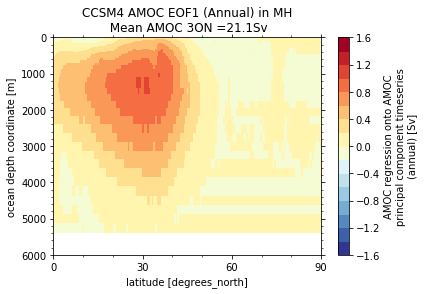

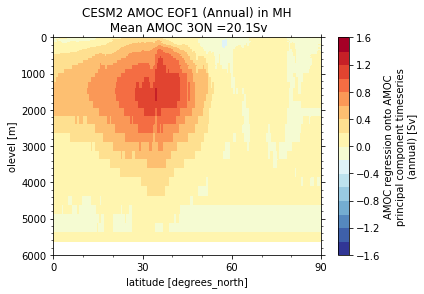

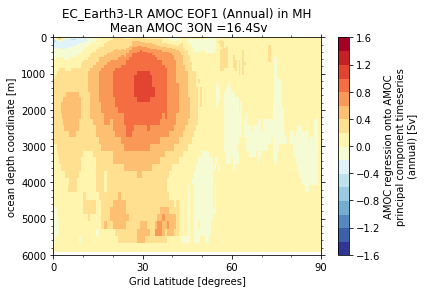

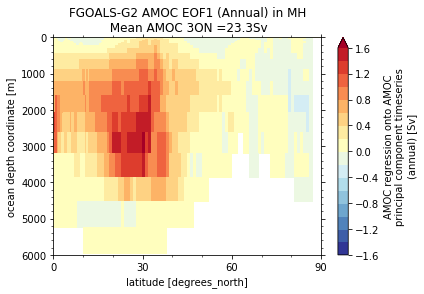

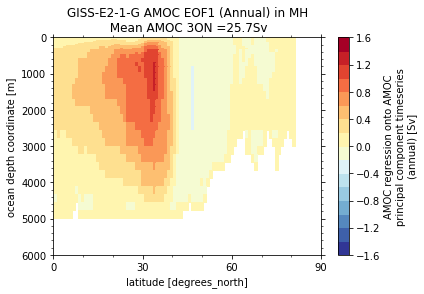

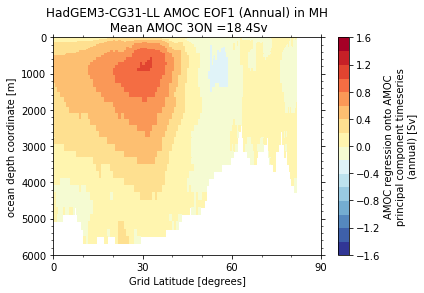

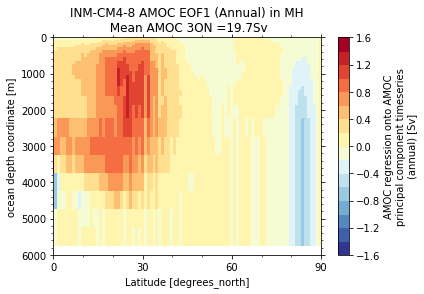

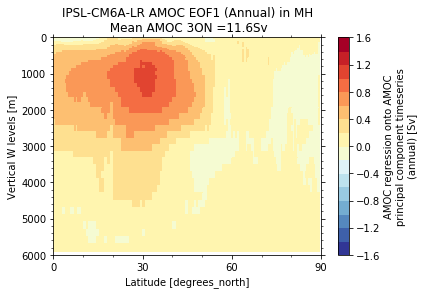

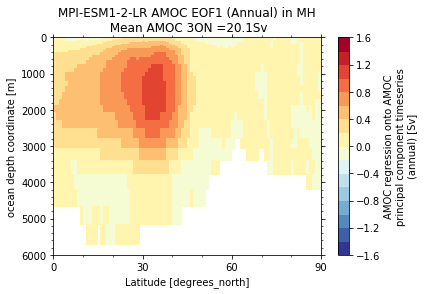

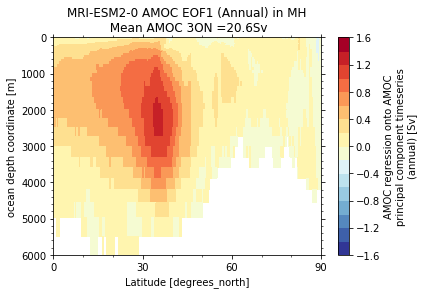

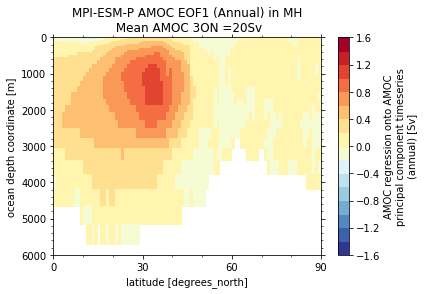

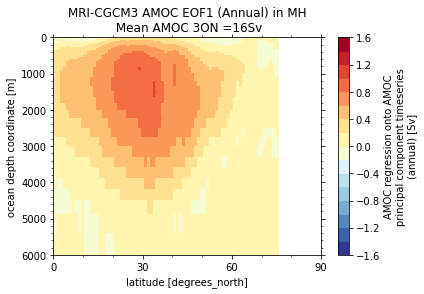

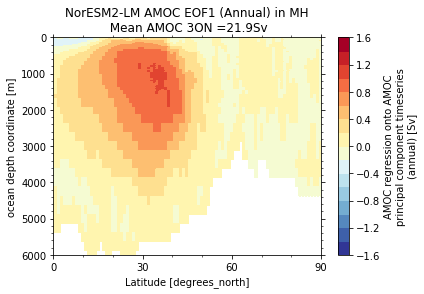

In [48]:
for i in range (0,len(modelname)):
    fig=plt.figure() 
    ax=fig.add_subplot(111)

    lat_sliced=amoc_pattern[i].sel(lat_amoc=slice(0,90))
    level=np.arange(-1.6,1.8,0.2)
    lat_sliced.plot(yincrease=False,cmap='RdYlBu_r',levels=level)

    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.yaxis.set_major_locator(MultipleLocator(1000))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

    ax.set_ylim(6000,0)
    ax.set_xlim(0,90)
    c=amoc_pattern[i].pcvar
    ax.set(title='%s AMOC EOF1 (Annual) in MH\n %s' %(model_name[i],c))

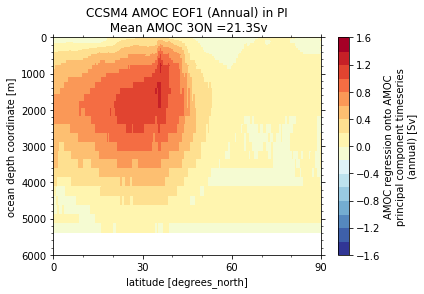

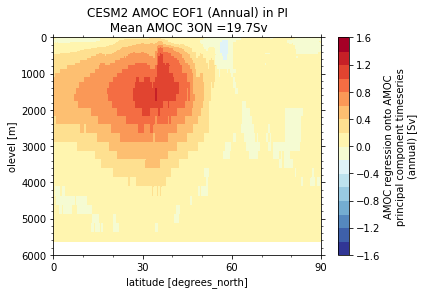

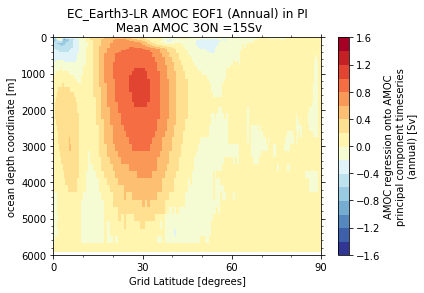

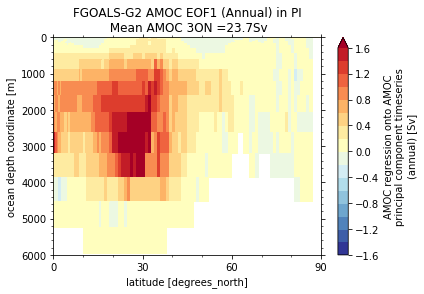

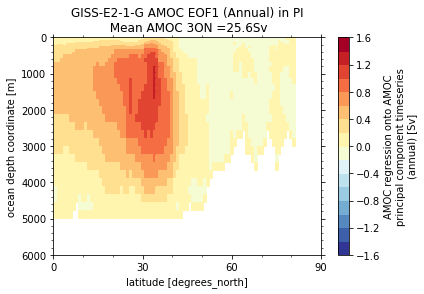

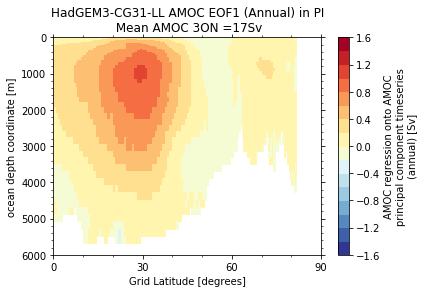

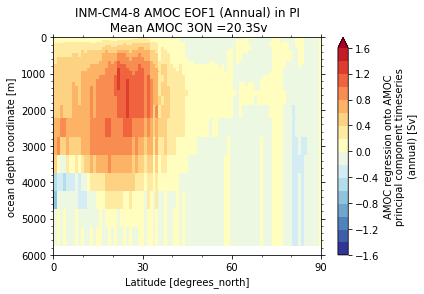

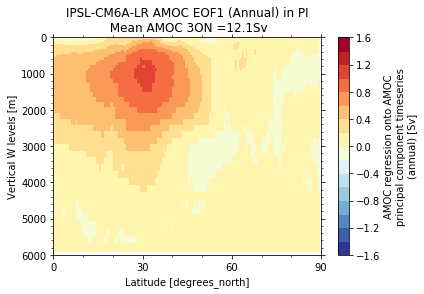

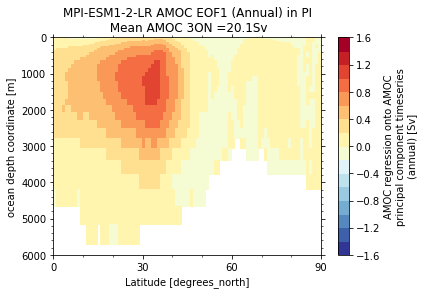

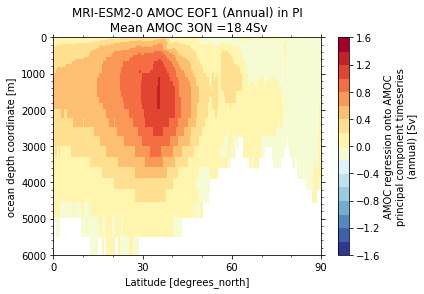

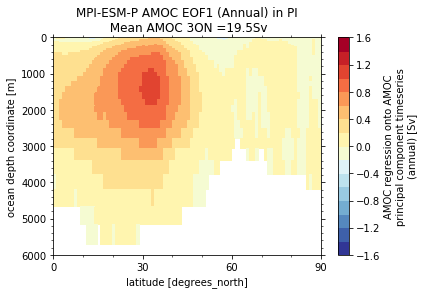

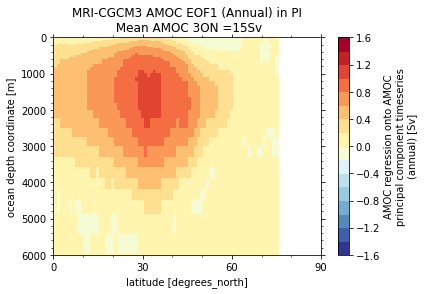

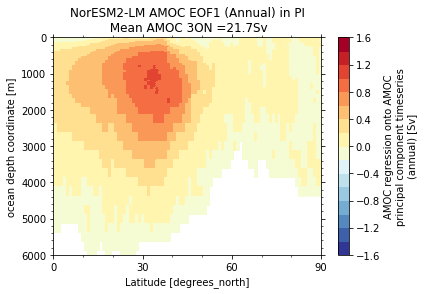

In [50]:
for i in range (0,len(modelname)):
    fig=plt.figure() 
    ax=fig.add_subplot(111)

    pi_lat_sliced=pi_amoc_pattern[i].sel(lat_amoc=slice(0,90))
    level=np.arange(-1.6,1.8,0.2)
    pi_lat_sliced.plot(yincrease=False,cmap='RdYlBu_r',levels=level)

    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.yaxis.set_major_locator(MultipleLocator(1000))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

    ax.set_ylim(6000,0)
    ax.set_xlim(0,90)
    cc=pi_amoc_pattern[i].pcvar
    ax.set(title='%s AMOC EOF1 (Annual) in PI\n %s' %(model_name[i],cc))